In [44]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

In [3]:
data=pd.read_csv("crop_recommendation.csv")
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [14]:
list(data["label"].unique())

['rice',
 'maize',
 'chickpea',
 'kidneybeans',
 'pigeonpeas',
 'mothbeans',
 'mungbean',
 'blackgram',
 'lentil',
 'pomegranate',
 'banana',
 'mango',
 'grapes',
 'watermelon',
 'muskmelon',
 'apple',
 'orange',
 'papaya',
 'coconut',
 'cotton',
 'jute',
 'coffee']

# DATA PREPROCESSING

In [6]:
y=pd.get_dummies(data["label"])
y
x=data.drop(["label"],axis=1)

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,random_state=9,test_size=0.2,stratify=data["label"])

# MODEL

In [28]:
model=keras.Sequential([
    keras.layers.Input(shape=7),
    keras.layers.Dense(units=32,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=64,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=22,activation="softmax")
])

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                256       
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 22)                1430      
                                                                 
Total params: 3,798
Trainable params: 3,798
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss="CategoricalCrossentropy",optimizer="adam",metrics=["accuracy"])

In [46]:
history=model.fit(x_train,
                 y_train,
                 epochs=20,
                 batch_size=32,
                 validation_data=[x_test,y_test])

Epoch 1/20
55/55 [==============================] - 0s 3ms/step - loss: 0.3300 - accuracy: 0.8784 - val_loss: 0.1670 - val_accuracy: 0.9455
Epoch 2/20
55/55 [==============================] - 0s 2ms/step - loss: 0.3184 - accuracy: 0.8847 - val_loss: 0.1559 - val_accuracy: 0.9500
Epoch 3/20
55/55 [==============================] - 0s 2ms/step - loss: 0.2982 - accuracy: 0.8938 - val_loss: 0.1564 - val_accuracy: 0.9545
Epoch 4/20
55/55 [==============================] - 0s 2ms/step - loss: 0.2977 - accuracy: 0.8847 - val_loss: 0.1488 - val_accuracy: 0.9523
Epoch 5/20
55/55 [==============================] - 0s 2ms/step - loss: 0.2843 - accuracy: 0.8994 - val_loss: 0.1439 - val_accuracy: 0.9591
Epoch 6/20
55/55 [==============================] - 0s 2ms/step - loss: 0.2851 - accuracy: 0.8926 - val_loss: 0.1466 - val_accuracy: 0.9500
Epoch 7/20
55/55 [==============================] - 0s 2ms/step - loss: 0.2839 - accuracy: 0.8903 - val_loss: 0.1344 - val_accuracy: 0.9545
Epoch 8/20
55/55 [==

In [40]:
train_predict=model.predict(x_train)
train_predict

55/55 [==============================] - 0s 1ms/step


array([[7.66353381e-08, 2.55922241e-05, 1.77188427e-04, ...,
        1.89807190e-06, 1.03761704e-05, 2.50552199e-04],
       [2.19998474e-05, 9.94487584e-01, 1.26078969e-03, ...,
        1.83386177e-08, 1.37189534e-04, 2.30000910e-06],
       [2.46020534e-07, 3.02700937e-04, 1.50768683e-04, ...,
        9.02404463e-06, 1.77831389e-05, 4.30690096e-04],
       ...,
       [2.63496677e-05, 9.93507624e-01, 2.07426230e-04, ...,
        3.96178841e-08, 4.64225159e-05, 1.55498929e-05],
       [1.03186812e-06, 1.16052512e-07, 7.74572641e-07, ...,
        3.31956596e-09, 7.01571698e-05, 6.55870150e-11],
       [1.40759866e-08, 3.00515488e-08, 1.15810835e-05, ...,
        1.84228634e-06, 1.16451694e-04, 7.10016247e-05]], dtype=float32)

In [36]:
train_pred=np.argmax(train_predict,axis=1)
train_pred

array([11,  1, 11, ...,  1, 17,  5], dtype=int64)

In [38]:
pd.get_dummies(train_pred)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1757,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [41]:
test_pred=np.argmax(model.predict(x_test),axis=1)
test_pred

14/14 [==============================] - 0s 971us/step


array([13,  8, 10, 16,  4,  8, 17, 21,  6,  7, 12,  1,  6,  0,  9, 10,  2,
        0,  3,  4, 16, 17, 18, 11,  4, 10, 16, 19,  0, 14,  9, 14,  2, 13,
       11,  8,  3,  4,  5,  7, 14, 20, 19,  9, 14,  5, 21, 19,  7,  1,  6,
       11, 19, 16,  0, 19, 15,  1, 20, 17, 21, 21, 19, 21, 21,  6,  1,  5,
       20,  0, 15, 21,  6,  1,  9,  3,  2, 14, 13,  1,  8,  2,  1, 13, 20,
       19, 19, 14, 12,  2, 20,  6, 18, 11, 12,  7, 17, 18, 21,  5, 13, 13,
        9, 12, 19,  8,  3,  3, 11, 11,  7, 19,  3,  4, 16, 20, 20,  6,  0,
        5,  9, 11, 13,  3,  3, 21, 15, 21,  8,  4,  2,  1, 14,  7,  6, 11,
        8, 16, 14, 15, 16, 20, 17, 16, 18,  3,  3, 15, 20,  9, 16, 12,  9,
       10,  7, 15, 14,  5, 21,  6,  8,  0, 15, 20, 20, 13,  1, 17,  3,  3,
       12,  1,  2,  0,  5,  7,  6,  2, 10,  5,  5, 16, 21, 16,  7, 13, 17,
       18,  6,  5,  1, 18, 13,  2, 11, 20,  2,  1, 19, 14, 15, 15,  4,  8,
        7, 10,  5,  2, 14,  3, 21, 14, 12, 12, 12,  7, 14, 17,  9,  5, 18,
        1,  7, 15, 15, 18

In [42]:
pd.get_dummies(test_pred)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
436,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
437,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
438,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# VISUALIZATION OF SCORE AND LOSS OF THE MODEL

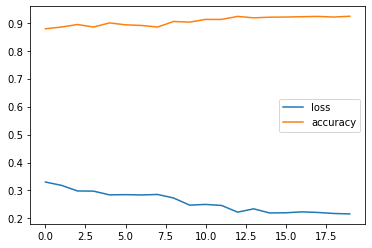

In [47]:
plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"])
#plt.plot(history.history["precision"])
plt.legend(["loss","accuracy"])